In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for unet neo 
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo  
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning

In [ ]:
import model.neo_unet as md 
print(md.NeoUNet())

Using cache found in /root/.cache/torch/hub/PingoLH_Pytorch-HarDNet_master


ImageNet pretrained weights for HarDNet68 is loaded
Done load hardnet 68 
NeoUNet(
  (encoder): HarDNet(
    (base): ModuleList(
      (0): ConvLayer(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU6(inplace=True)
      )
      (1): ConvLayer(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU6(inplace=True)
      )
      (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (3): HarDBlock(
        (layers): ModuleList(
          (0): ConvLayer(
            (conv): Conv2d(64, 14, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (norm): BatchNorm2d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [ ]:
%cd /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-survey

/content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-survey


In [ ]:
from glob import glob

def get_all_image_name():
    path_images = glob('/content/drive/MyDrive/20211/prj3/data/train/train/*.jpeg')
    images_name_list = [i.split('/')[-1].split('.')[0] for i in path_images]
    return images_name_list 
images_name_list = get_all_image_name() 

path_img = '/content/drive/MyDrive/20211/prj3/data/train/train'
path_gt = '/content/drive/MyDrive/20211/prj3/data/train_gt/train_gt'
from data_loader import PolypDataset
import matplotlib.pyplot as plt

pl_dataset = PolypDataset(images_name_list, path_img, path_gt)

# show image

In [ ]:
from data_loader import PolypDataset
import matplotlib.pyplot as plt
import numpy as np

r = pl_dataset.__getitem__(0)
image = r['image'].permute(1, 2, 0).numpy()  # (3, 352, 352) => (352, 352, 3)
gt = r['gt'].permute(1, 2, 0).numpy()   # [2, 352, 352] => (352, 352, 2) 
# print(np.unique(gt[:,:,0])) # cái vùng neo , chỉ chưa giá trị 0-1
# print(np.unique(gt[:,:,1])) # cái vùng non- neo , chỉ chưa giá trị 0-1
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 30))
ax[0].set_title('ori')
ax[1].set_title('neo')
ax[2].set_title('non-neo')
ax[0].imshow(image)
ax[1].imshow(gt[:,:,0])
ax[2].imshow(gt[:,:,1])

# train

In [ ]:
import train
train.train_loop_unet(pl_dataset)

Epoch 001/004


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


RuntimeError: ignored

0it [00:00, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
0it [00:01, ?it/s]


NameError: ignored

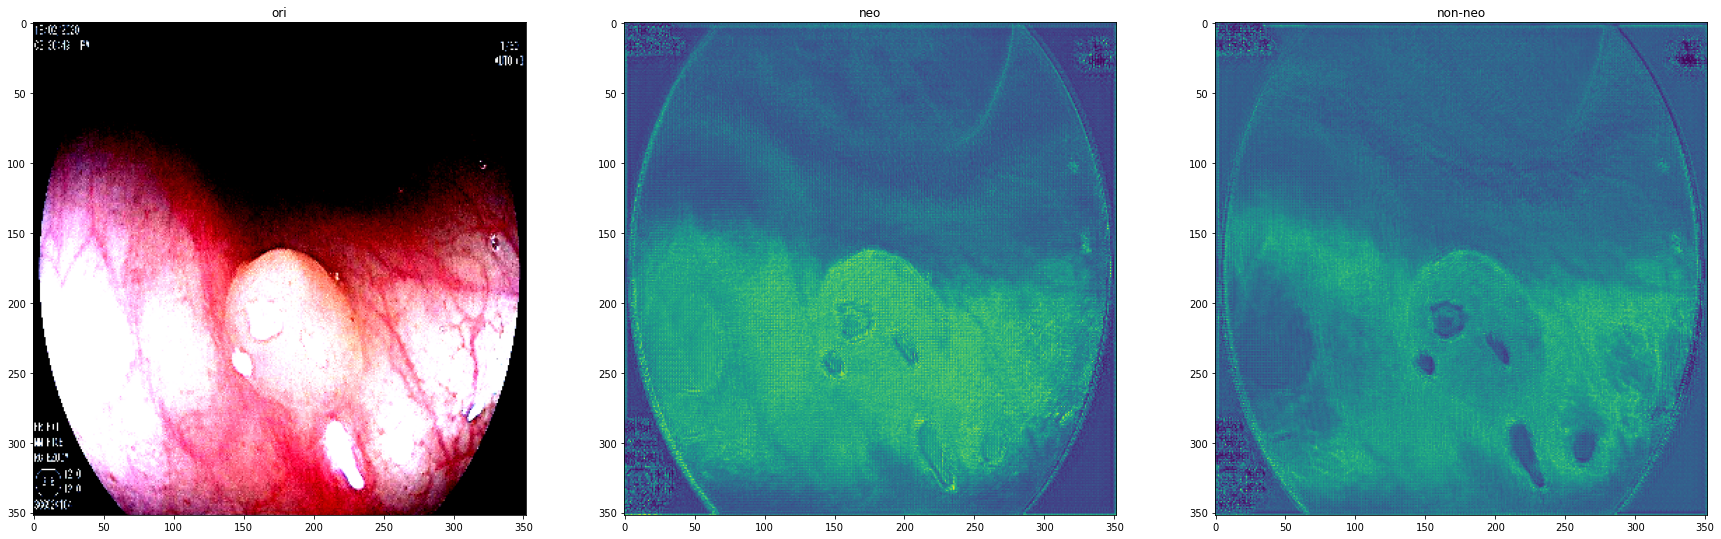

In [ ]:
import test
# test.run_test_neo("/content/drive/MyDrive/20211/prj3/neoplasm-detection/model/pth/neounet/neo_epoch003_loss1.70043.pth")
test.run_test_unet("/content/drive/MyDrive/20211/prj3/neoplasm-detection/model/pth/unet/unet_epoch003_loss0.27923.pth")

In [ ]:
import output.submit_origin as sb
sb.make_submit("/content/drive/MyDrive/20211/prj3/neoplasm-detection/output/neo_epoch003_loss1.70043")

In [ ]:
import numpy as np


a=np.array(  [[1,2,3,4,5],
              [1,2,3,4,5],
              [1,2,3,4,5],
              [1,2,3,4,5]])

In [ ]:
a.shape
a[:,[0]]

array([[1],
       [1],
       [1],
       [1]])